# Radical-stroke Index Analysis

The purpose of this script it to demonstrate the method of generating a good training dataset for confusable embedding encoder. To achieve this, we analyze Chinese radicals and stroke count to:
1. find characters that are representative of Chinese characters;
2. include edge cases and outliers not usually selected by random selection. 

## Usage
In Jupyter Notebook, select tab **Cell**, then **Run All**. The entire script should finish running in less than 1 minute.

## Output
6 datasets in txt format:
    - charset_1k.txt: selected 1000 Unicode code points
    - charset_2k.txt: selected 2000 Unicode code points
    - charset_4k.txt: selected 4000 Unicode code points
    - randset_1k.txt: randomly selected 1000 Unicode code points
    - randset_2k.txt: randomly selected 2000 Unicode code points
    - randset_4k.txt: randomly selected 4000 Unicode code points

## Download Unihan Data

See https://unicode.org/charts/unihan.html

In [1]:
! mkdir Unihan
! curl -O http://unicode.org/Public/UCD/latest/ucd/Unihan.zip
! apt-get -y install unzip
! unzip Unihan.zip -d Unihan/
! rm Unihan.zip
! python3 -m pip install pandas 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6879k  100 6879k    0     0   999k      0  0:00:06  0:00:06 --:--:-- 1094k
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Archive:  Unihan.zip
  inflating: Unihan/Unihan_DictionaryIndices.txt  
  inflating: Unihan/Unihan_DictionaryLikeData.txt  
  inflating: Unihan/Unihan_IRGSources.txt  
  inflating: Unihan/Unihan_NumericValues.txt  
  inflating: Unihan/Unihan_OtherMappings.txt  
  inflating: Unihan/Unihan_RadicalStrokeCounts.txt  
  inflating: Unihan/Unihan_Readings.txt  
  inflating: Unihan/Unihan_Variants.txt  


### Consider only KangXi radicals (no CJK Radicals Supplement)

In [2]:
with open('Unihan/Unihan_RadicalStrokeCounts.txt') as f_in:
    with open('Unihan_RadicalStrokeCounts_kRSKangXi.txt', "w+") as f_out: 
        for line in f_in:
            if line[0] == '#' or len(line) <= 1:
                continue
            elif line.split('\t')[1] == 'kRSKangXi':
                f_out.write(line)

## Analyze KangXi radicals

In [3]:
# Mapping from radical number to radical string
number_to_radical = {}
for i in range(214):
    number_to_radical[i+1] = chr(int('0x2F00', 16) + i)

In [4]:
# Mapping from radical number to radical stroke count
radical_numbers = [i+1 for i in range(214)]
stroke_counts = [1]*6 + [2]*23 + [3]*31 + [4]*34 + [5]*23 + [6]*29 + [7]*20 + [8]*9 + [9]*11 + [10]*8 + [11]*6 + \
                [12]*4 + [13]*4 + [14]*2 + [15]*1 + [16]*2 + [17]*1
number_to_stoke_count = dict(zip(radical_numbers, stroke_counts))

In [5]:
# Get data
import pandas as pd
CRS_list = [] # (code_point, character, radical_number, radical, radical_stroke_count, remaining_stroke_count)
with open('Unihan_RadicalStrokeCounts_kRSKangXi.txt') as f:
    for line in f:
        if line[0] == '#' or len(line) <= 1:
            continue
        fields = line.split('\t')
        codepoint, radical, stroke = fields[0], fields[2].split('.')[0], fields[2].split('.')[-1][:-1]
        CRS_list.append((codepoint, radical, stroke))
CRS_list = [(crs[0], chr(int('0x'+crs[0][2:], 16)), int(crs[1]), number_to_radical[int(crs[1])], 
             number_to_stoke_count[int(crs[1])], int(crs[2])) for crs in CRS_list]
df = pd.DataFrame(CRS_list, columns = ['code_point', 'character', 'radical_number', 'radical', 'radical_strokes',
                                            'remaining_strokes'])
df['total_strokes'] = df['radical_strokes'] + df['remaining_strokes']

In [6]:
# Total number of code points
len(CRS_list)

63696

In [7]:
# First 10 lines of the data
df.head(10)

,code_point,character,radical_number,radical,radical_strokes,remaining_strokes,total_strokes
0,U+3687,㚇,35,⼢,3,6,9
1,U+3A16,㨖,64,⼿,4,9,13
2,U+3ADA,㫚,72,⽇,4,4,8
3,U+3B39,㬹,130,⾁,6,8,14
4,U+4091,䂑,111,⽮,5,5,10
5,U+4347,䍇,121,⽸,6,5,11
6,U+49F9,䧹,172,⾫,8,5,13
7,U+4CED,䳭,196,⿃,11,9,20
8,U+4D60,䵠,203,⿊,12,3,15
9,U+4E00,一,1,⼀,1,0,1


In [8]:
# List all radicals
list(set(df['radical']))

['⽚',
 '⼮',
 '⾘',
 '⼹',
 '⼊',
 '⼼',
 '⽠',
 '⽺',
 '⾿',
 '⿅',
 '⾥',
 '⼕',
 '⽒',
 '⾧',
 '⾢',
 '⽅',
 '⿊',
 '⽊',
 '⼨',
 '⼺',
 '⼻',
 '⿓',
 '⽄',
 '⽣',
 '⽶',
 '⾏',
 '⼄',
 '⼥',
 '⼵',
 '⾖',
 '⽲',
 '⿕',
 '⾁',
 '⽻',
 '⼴',
 '⼢',
 '⿎',
 '⾩',
 '⾲',
 '⽎',
 '⾎',
 '⾼',
 '⽩',
 '⿀',
 '⿃',
 '⿍',
 '⽭',
 '⾷',
 '⾛',
 '⾮',
 '⿇',
 '⼧',
 '⿏',
 '⽽',
 '⾤',
 '⾪',
 '⽦',
 '⼾',
 '⼡',
 '⾐',
 '⾡',
 '⽥',
 '⾇',
 '⾦',
 '⾕',
 '⽏',
 '⽤',
 '⼟',
 '⽡',
 '⽰',
 '⼣',
 '⾱',
 '⽸',
 '⼯',
 '⼈',
 '⾈',
 '⾂',
 '⽑',
 '⾉',
 '⾣',
 '⾟',
 '⼩',
 '⽷',
 '⽗',
 '⽙',
 '⾵',
 '⼤',
 '⼛',
 '⿂',
 '⾃',
 '⾗',
 '⼁',
 '⼜',
 '⼸',
 '⾙',
 '⾶',
 '⽵',
 '⾯',
 '⿋',
 '⼋',
 '⼶',
 '⽌',
 '⽜',
 '⾓',
 '⽈',
 '⾸',
 '⼆',
 '⼳',
 '⾽',
 '⾞',
 '⼰',
 '⾑',
 '⾬',
 '⽿',
 '⼦',
 '⽆',
 '⽹',
 '⽍',
 '⽋',
 '⽛',
 '⼠',
 '⿆',
 '⽃',
 '⾄',
 '⽪',
 '⼽',
 '⾾',
 '⽢',
 '⽨',
 '⽐',
 '⼱',
 '⼲',
 '⽱',
 '⽳',
 '⼔',
 '⽕',
 '⽇',
 '⼬',
 '⽘',
 '⾹',
 '⿉',
 '⼂',
 '⼷',
 '⾒',
 '⾋',
 '⾠',
 '⼉',
 '⾅',
 '⾝',
 '⼞',
 '⽓',
 '⾆',
 '⾭',
 '⿐',
 '⽔',
 '⼀',
 '⿁',
 '⾊',
 '⼖',
 '⾜',
 '⿒',
 '⼍',
 '⼘',
 '⾚',
 '⽟',
 '⿈',
 '⽯'

In [9]:
# Check if all code points are unique in the dataset
code_points = df['code_point'].tolist()
len(code_points) == len(set(code_points))

True

In [10]:
# Get count for each radical
radical_num_list = df['radical_number'].tolist()
radical_count = dict()
for i in range(214):
    radical_count[i+1] = radical_num_list.count(i+1)

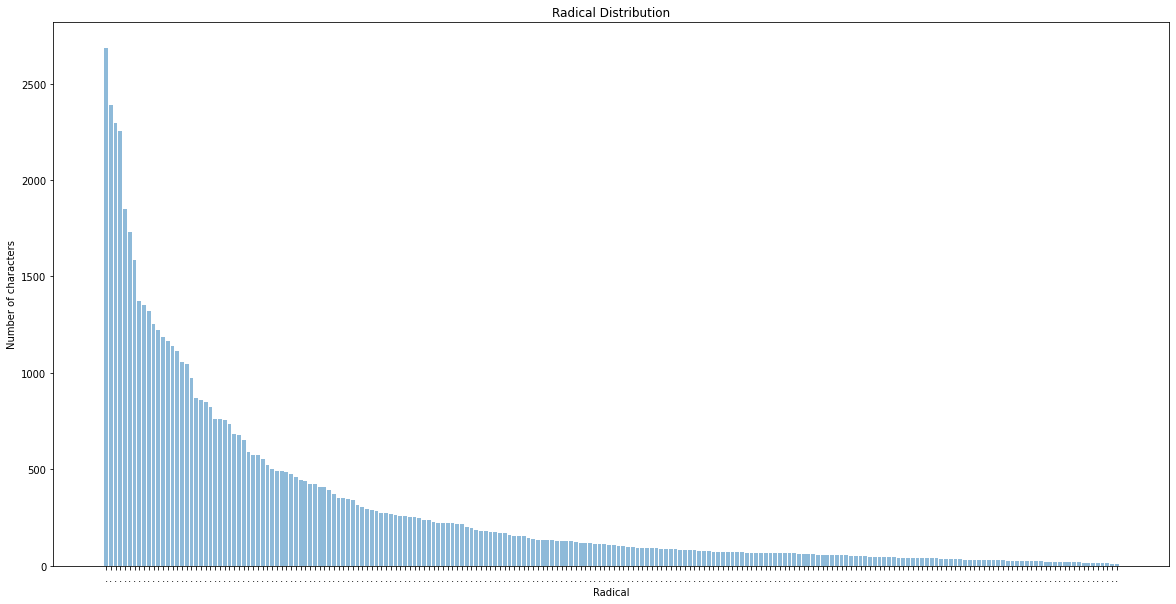

In [11]:
# Plot sorted radical count
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10

x = ['.'] * 214
y = sorted(list(radical_count.values()), reverse=True)
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Number of characters')
plt.xlabel('Radical')
plt.title('Radical Distribution')

plt.show()

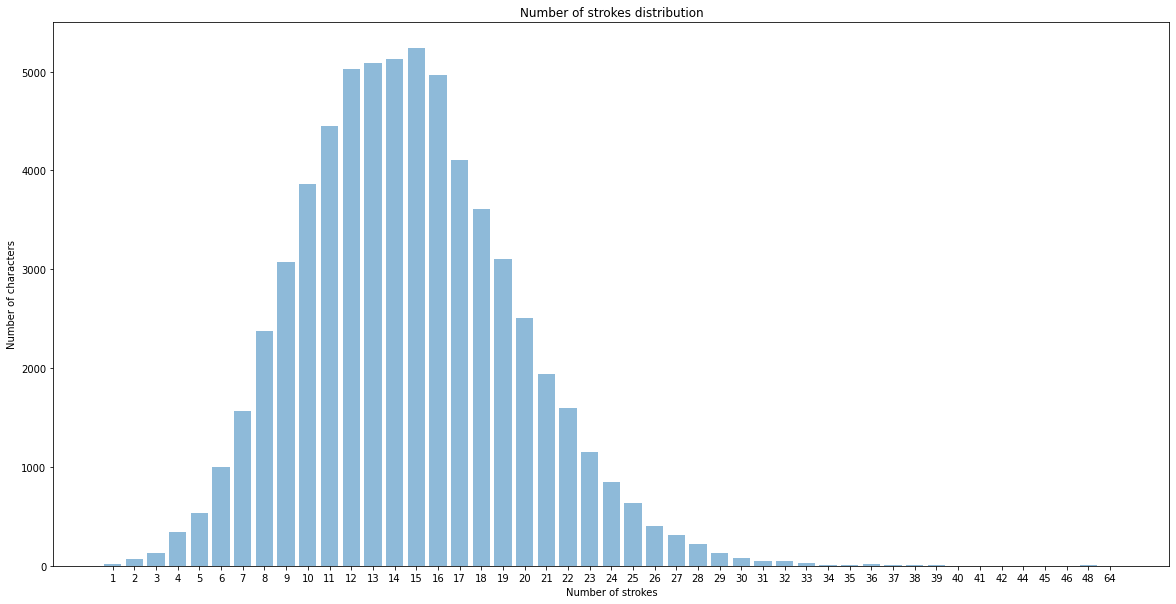

In [12]:
# Get number of characters for specific stroke number
stroke_list = df['total_strokes'].tolist()
stroke_unique = sorted(list(set(stroke_list)))
char_count = {}
for stroke_num in stroke_unique:
    char_count[stroke_num] = stroke_list.count(stroke_num)

x = char_count.keys()
y = char_count.values()
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Number of characters')
plt.xlabel('Number of strokes')
plt.title('Number of strokes distribution')

plt.show()

We want to make sure **outlier** characters with special features are selected in the dataset. We want to make sure the dataset has a high degree of **diversity**.

## Select charset_1000

In [13]:
dataset = set()

### Include all radicals

In [14]:
radical_set = set(df['radical'])
dataset = dataset.union(radical_set)

### Select character with basic and compound strokes
See https://en.wikipedia.org/wiki/Stroke_(CJK_character)

In [15]:
# Add group of characters that includes all basic and compound strokes
basic_stroke_chars = ['二', '孑', '了', '又', '口', '勺', '计', '凹', '殳', '飞', '艺', '凸', '及', '队', '乃', '中',
                      '水', '永', '以', '山', '亡', '肅', '己', '亞', '丂', '乂', '人', '乄', '公', '巡', '火', '尺',
                      '之', '弋', '必', '心', '狐']
dataset = set.union(dataset, set(basic_stroke_chars))

### Select one other character for each radical

In [16]:
import random
random.seed(2066)
def add_char_by_radical(df, dataset, repeat=1):
    for j in range(repeat):
        for i in range(214): 
            chars = df.loc[df['radical_number'] == i + 1]['character'].tolist()
            char = random.choice(chars)
            dataset.add(char)
add_char_by_radical(df, dataset)

### Select 2 characters for each storke number

In [17]:
def add_char_by_stroke(df, dataset, repeat=1):
    stroke_list = df['total_strokes'].tolist()
    stroke_unique = (set(stroke_list))
    for j in range(repeat):
        for stroke_num in stroke_unique:
            chars = df.loc[df['total_strokes'] == stroke_num]['character'].tolist()
            char = random.choice(chars)
            dataset.add(char)
add_char_by_stroke(df, dataset, 2)

### Select simple characters
As seen in the distribution, we want to make sure that special characters are selected in the dataset.

In [18]:
chars = df.loc[df['total_strokes'] <= 4]['character'].tolist()
chars = random.choices(chars, k=80)
dataset = set.union(dataset, set(chars))

### Select complicated characters

In [19]:
chars = df.loc[df['total_strokes'] >= 27]['character'].tolist()
chars = random.choices(chars, k=80)
dataset = set.union(dataset, set(chars))

### Fill dataset to 1000 randomly

In [20]:
def add_char_up_to(df, dataset, n=1000):
    chars = df['character'].tolist()
    while len(dataset) < n:
        dataset.add(random.choice(chars))
add_char_up_to(df, dataset, 1000)

In [21]:
charset_1k = dataset

## Select charset_2000

In [22]:
add_char_by_radical(df, dataset, 2)
add_char_by_stroke(df, dataset, 4)
add_char_up_to(df, dataset, 2000)

In [23]:
charset_2k = dataset

## Select charset_4000

In [24]:
add_char_by_radical(df, dataset, 4)
add_char_by_stroke(df, dataset, 8)
add_char_up_to(df, dataset, 4000)

In [25]:
charset_4k = dataset

## Generate randset_x

In [26]:
dataset = set()
add_char_up_to(df, dataset, 1000)
randset_1k = dataset
add_char_up_to(df, dataset, 2000)
randset_2k = dataset
add_char_up_to(df, dataset, 4000)
randset_4k = dataset

### Compare distributions

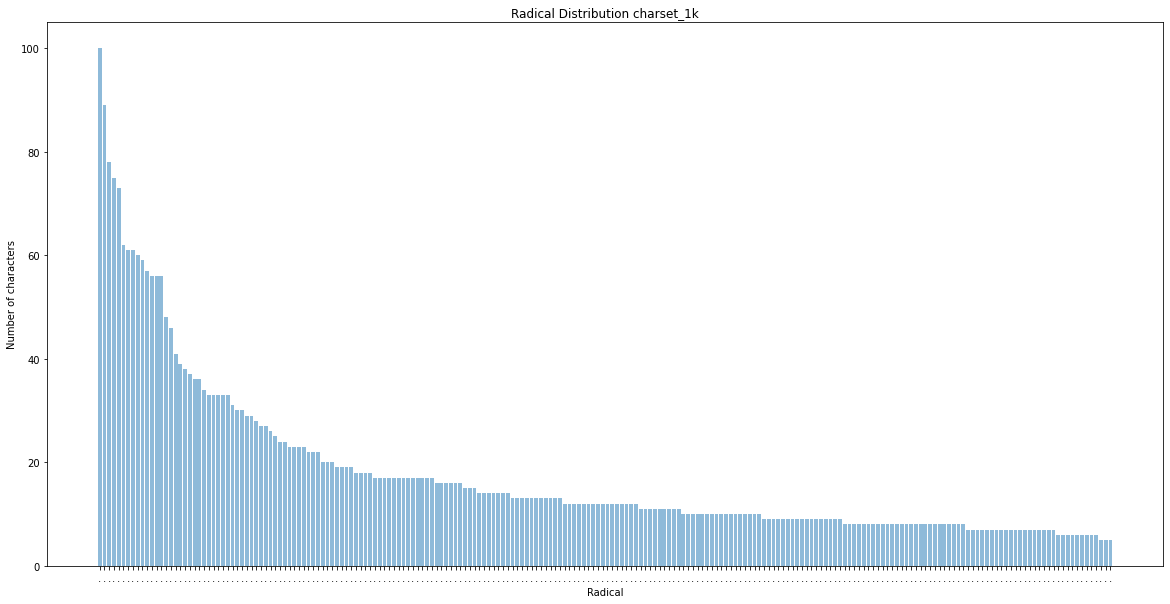

In [27]:
df_charset_1k = df[df['character'].isin(charset_1k)]

# Get count for each radical
radical_num_list = df_charset_1k['radical_number'].tolist()
radical_count = dict()
for i in range(214):
    radical_count[i+1] = radical_num_list.count(i+1)

# Plot
x = ['.'] * 214
y = sorted(list(radical_count.values()), reverse=True)
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Number of characters')
plt.xlabel('Radical')
plt.title('Radical Distribution charset_1k')

plt.show()

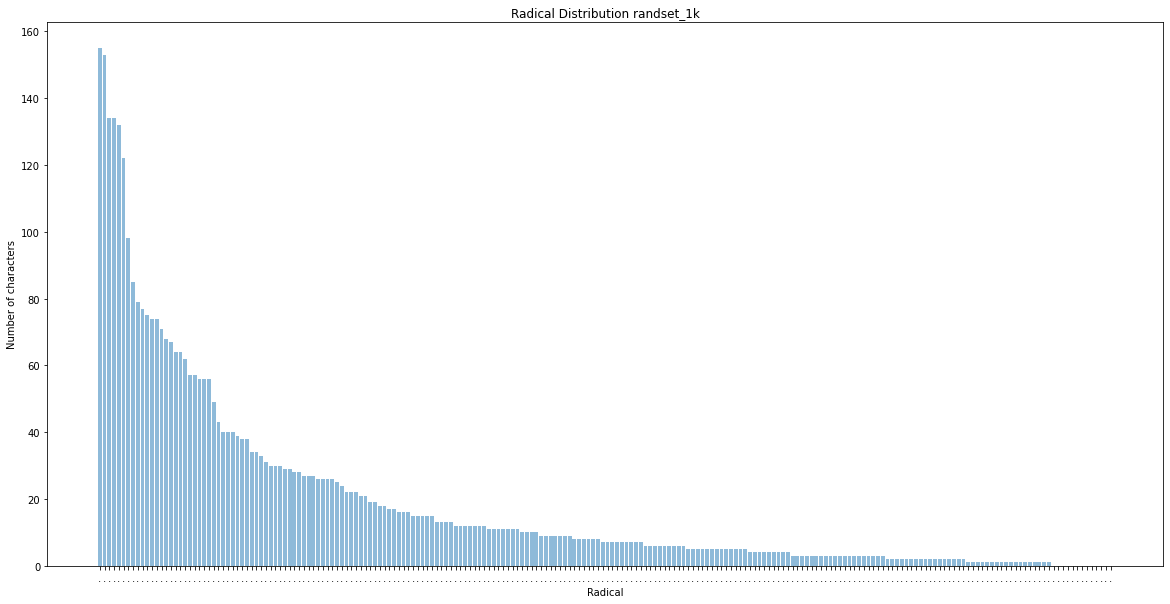

In [28]:
df_randset_1k = df[df['character'].isin(randset_1k)]

# Get count for each radical
radical_num_list = df_randset_1k['radical_number'].tolist()
radical_count = dict()
for i in range(214):
    radical_count[i+1] = radical_num_list.count(i+1)

# Plot
x = ['.'] * 214
y = sorted(list(radical_count.values()), reverse=True)
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Number of characters')
plt.xlabel('Radical')
plt.title('Radical Distribution randset_1k')

plt.show()

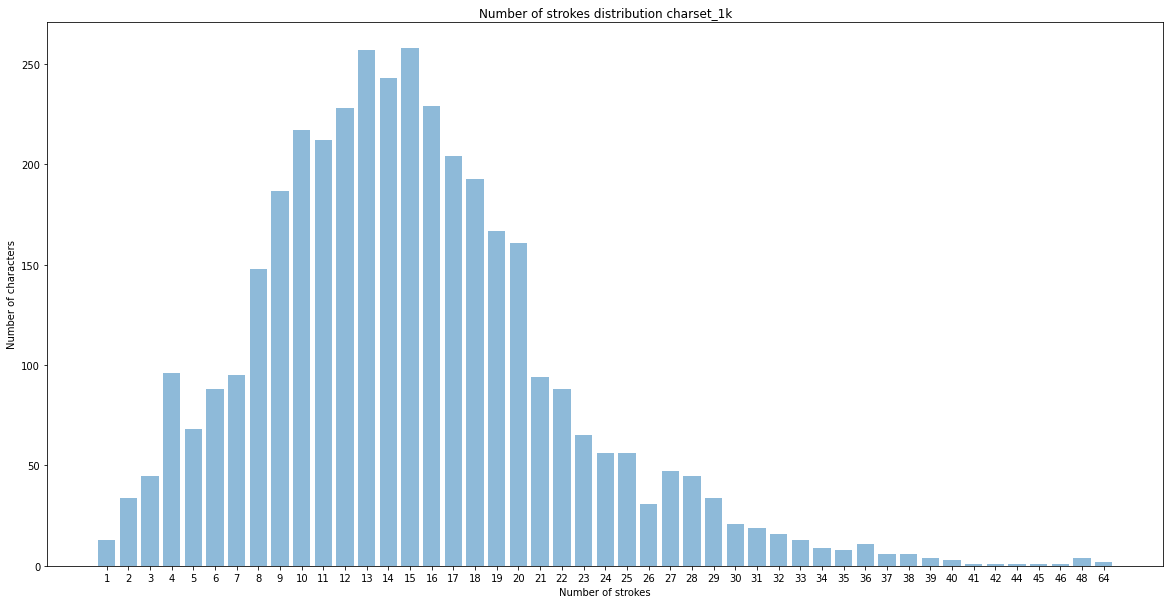

In [29]:
# Get number of characters for specific stroke number
stroke_list = df_charset_1k['total_strokes'].tolist()
stroke_unique = sorted(list(set(stroke_list)))
char_count = {}
for stroke_num in stroke_unique:
    char_count[stroke_num] = stroke_list.count(stroke_num)

x = char_count.keys()
y = char_count.values()
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Number of characters')
plt.xlabel('Number of strokes')
plt.title('Number of strokes distribution charset_1k')

plt.show()

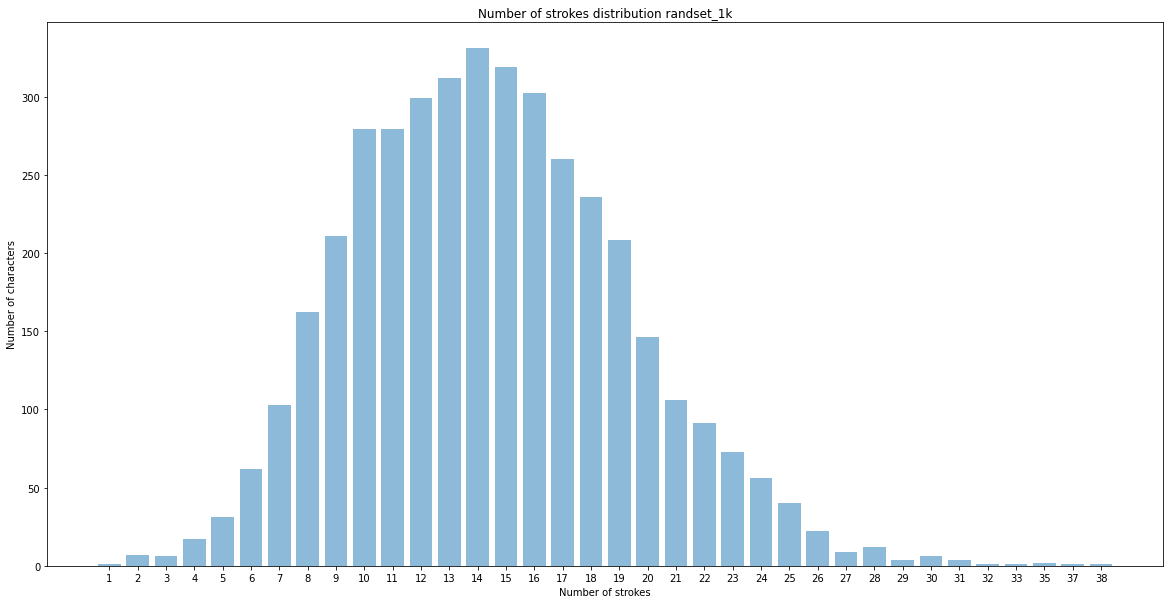

In [30]:
# Get number of characters for specific stroke number
stroke_list = df_randset_1k['total_strokes'].tolist()
stroke_unique = sorted(list(set(stroke_list)))
char_count = {}
for stroke_num in stroke_unique:
    char_count[stroke_num] = stroke_list.count(stroke_num)

x = char_count.keys()
y = char_count.values()
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Number of characters')
plt.xlabel('Number of strokes')
plt.title('Number of strokes distribution randset_1k')

plt.show()

## Store datasets

In [31]:
datasets = [charset_1k, charset_2k, charset_4k, randset_1k, randset_2k, randset_4k]
data_names = ['charset_1k', 'charset_2k', 'charset_4k', 'randset_1k', 'randset_2k', 'randset_4k']
for i in range(6):
    with open(data_names[i]+'.txt', "w+") as f_out: 
        for char in datasets[i]:
            f_out.write('U+' + str(hex(ord(char)))[2:] + '\n')